In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
import os

In [3]:
output_dirs = [ k  for k in os.listdir() if 'mrpc_output' in k ]

In [4]:
heads = [ np.load('%s/head_mask.npy' % k)  for k in output_dirs ]

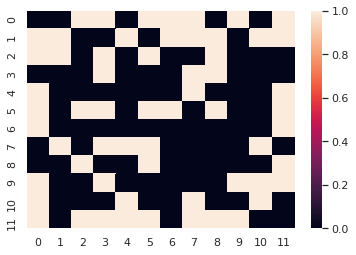

In [11]:
sns.heatmap(heads[0], vmin=0, vmax=1)

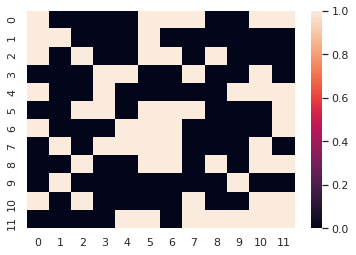

In [12]:
sns.heatmap(heads[1], vmin=0, vmax=1)

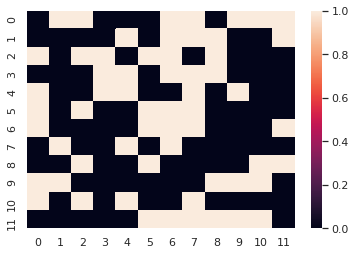

In [13]:
sns.heatmap(heads[2], vmin=0, vmax=1)

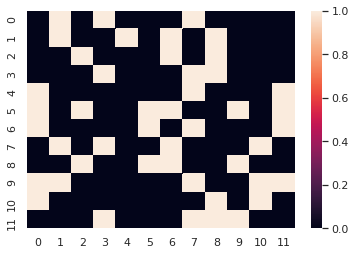

In [14]:
sns.heatmap(heads[3], vmin=0, vmax=1)

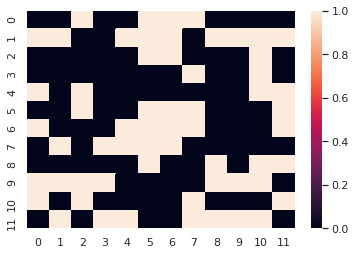

In [15]:
sns.heatmap(heads[4], vmin=0, vmax=1)

In [19]:
survivor = np.ones((12, 12))

In [20]:
for k in heads:
    survivor *= k 

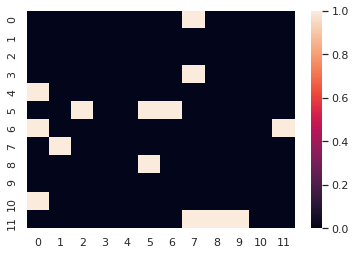

In [21]:
sns.heatmap(survivor, vmin=0, vmax=1)

In [5]:
count = np.zeros((12, 12))

In [6]:
for k in heads:
    count += k 

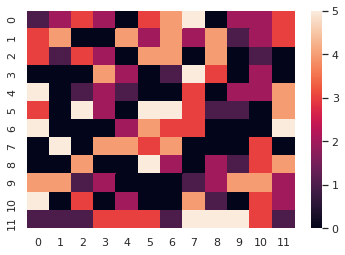

In [7]:
sns.heatmap(count)

In [44]:
idx = np.argmax(count, axis=1) # most important head in each layer
print(idx)

[7 1 5 7 0 2 0 1 5 0 0 7]


In [45]:
ticket = np.zeros((12, 12))

In [46]:
for i in range(12):
    ticket[i, idx[i]] = 1

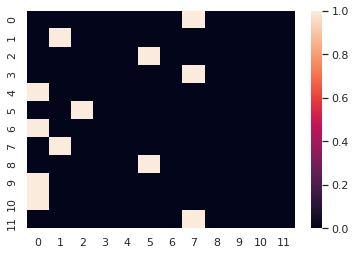

In [47]:
sns.heatmap(ticket) #

In [49]:
np.save( 'mrpc_win_ticket.npy', ticket)

In [55]:
np.random.seed(1234) # set random seed
random_ticket = np.zeros((12, 12))
for i in range(12):
    rand_idx = np.random.choice([ i for i in range(12)])
    random_ticket[i, rand_idx]=1


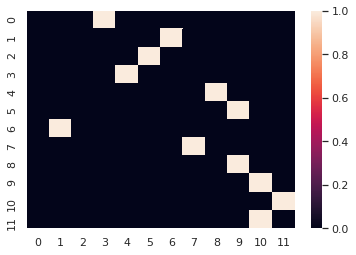

In [56]:
sns.heatmap(random_ticket) #

In [57]:
np.save( 'mrpc_random_ticket.npy', random_ticket)